<a href="https://colab.research.google.com/github/vani105/vani_Intern_Projects1/blob/main/MiniProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Build a diabetes prediction model using a dataset (for example, the Pima Indians Diabetes Dataset), we can use supervised learning algorithms such as Logistic Regression, Decision Trees, or Random Forest. Below is a complete code to build a diabetes prediction model, starting from loading the data to training the model and evaluating its performance.


# Diabetes Prediction Model

## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


## Load Pima Indians Diabetes Dataset

In [2]:
data = pd.read_csv("/content/diabetes.csv", encoding='latin1')
print(data.head())
print("Shape of dataset:")
print(data.shape)

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  
Shape of dataset:
(768, 9)


## Explore Dataset

* ED consists of:
  * Dataset Info
  * Statsical Measures
  * Missing Value Check
  * Checking Duplicate values
  * Kernal Plot
  * Swarm Plot
  * Pair Plot
  * Correlation Matrix
  * Class Distribution
  * Mean Values Grouped by Outcome
  * Separate data and variables

#### Dataset info

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


#### Getting the stastical measures of the data

In [4]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


#### Columns List

In [5]:
data.columns.tolist()

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age',
 'Outcome']

#### Missig Values Check

In [6]:
data.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


#### Checking Duplicate values

In [7]:
data.nunique()

,0
Pregnancies,17
Glucose,136
BloodPressure,47
SkinThickness,51
Insulin,186
BMI,248
DiabetesPedigreeFunction,517
Age,52
Outcome,2


#### Kernal density plot for understanding variance in the dataset

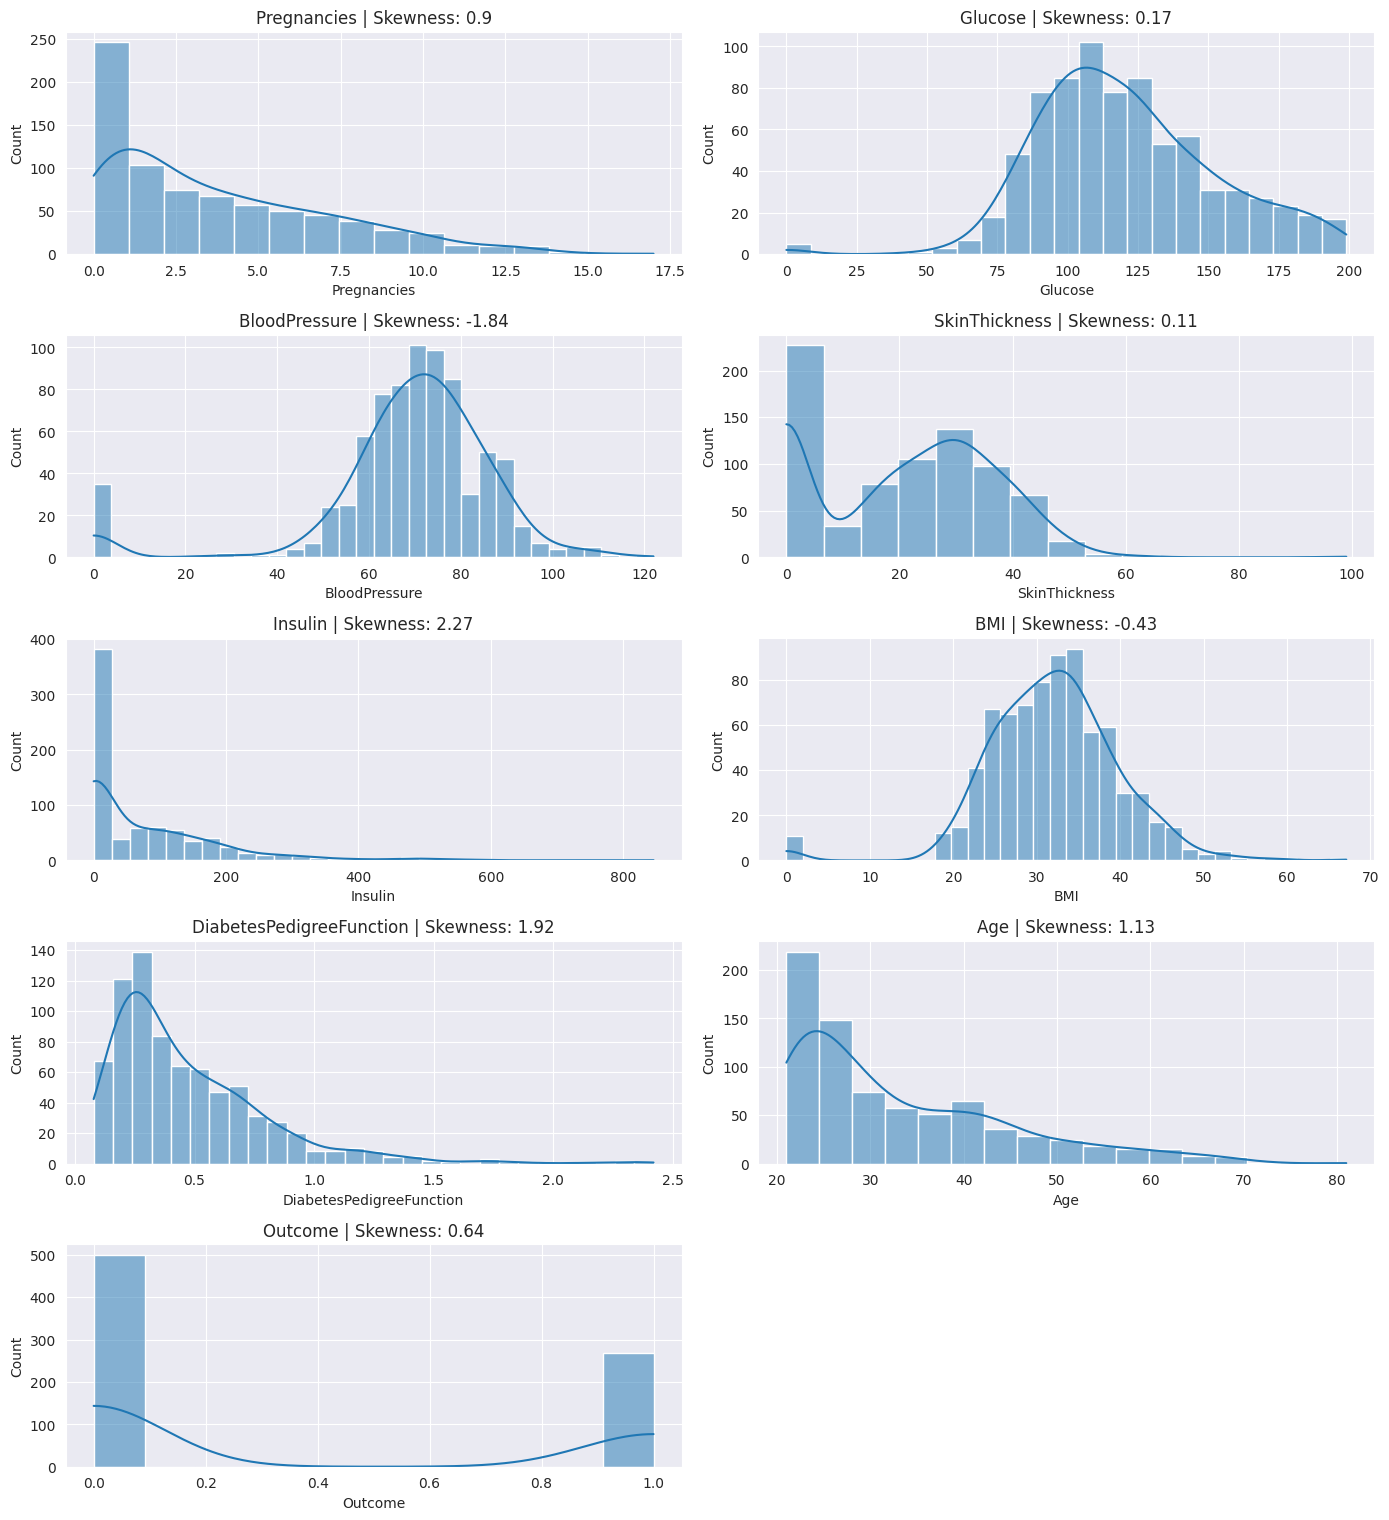

In [8]:
sns.set_style("darkgrid")
numerical_columns = data.select_dtypes(include=["int64", "float64"]).columns
plt.figure(figsize=(14, len(numerical_columns) * 3))
for idx, feature in enumerate(numerical_columns, 1):
    plt.subplot(len(numerical_columns), 2, idx)
    sns.histplot(data[feature], kde=True)
    plt.title(f"{feature} | Skewness: {round(data[feature].skew(), 2)}")
plt.tight_layout()
plt.show()

#### swarm plot for showing the outlier in the data

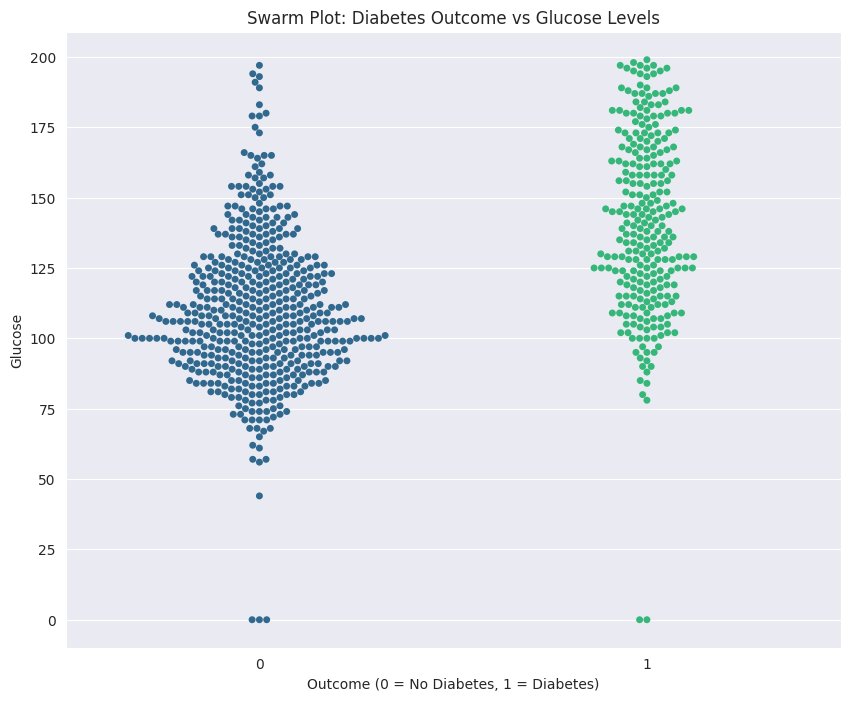

In [9]:
plt.figure(figsize=(10, 8))
sns.swarmplot(x="Outcome", y="Glucose", hue="Outcome", data=data, palette="viridis", legend=False)
plt.title('Swarm Plot: Diabetes Outcome vs Glucose Levels')
plt.xlabel('Outcome (0 = No Diabetes, 1 = Diabetes)')
plt.ylabel('Glucose')
plt.show()

#### Pair Plot for showng the distribution of the individual variables

<Figure size 1000x600 with 0 Axes>

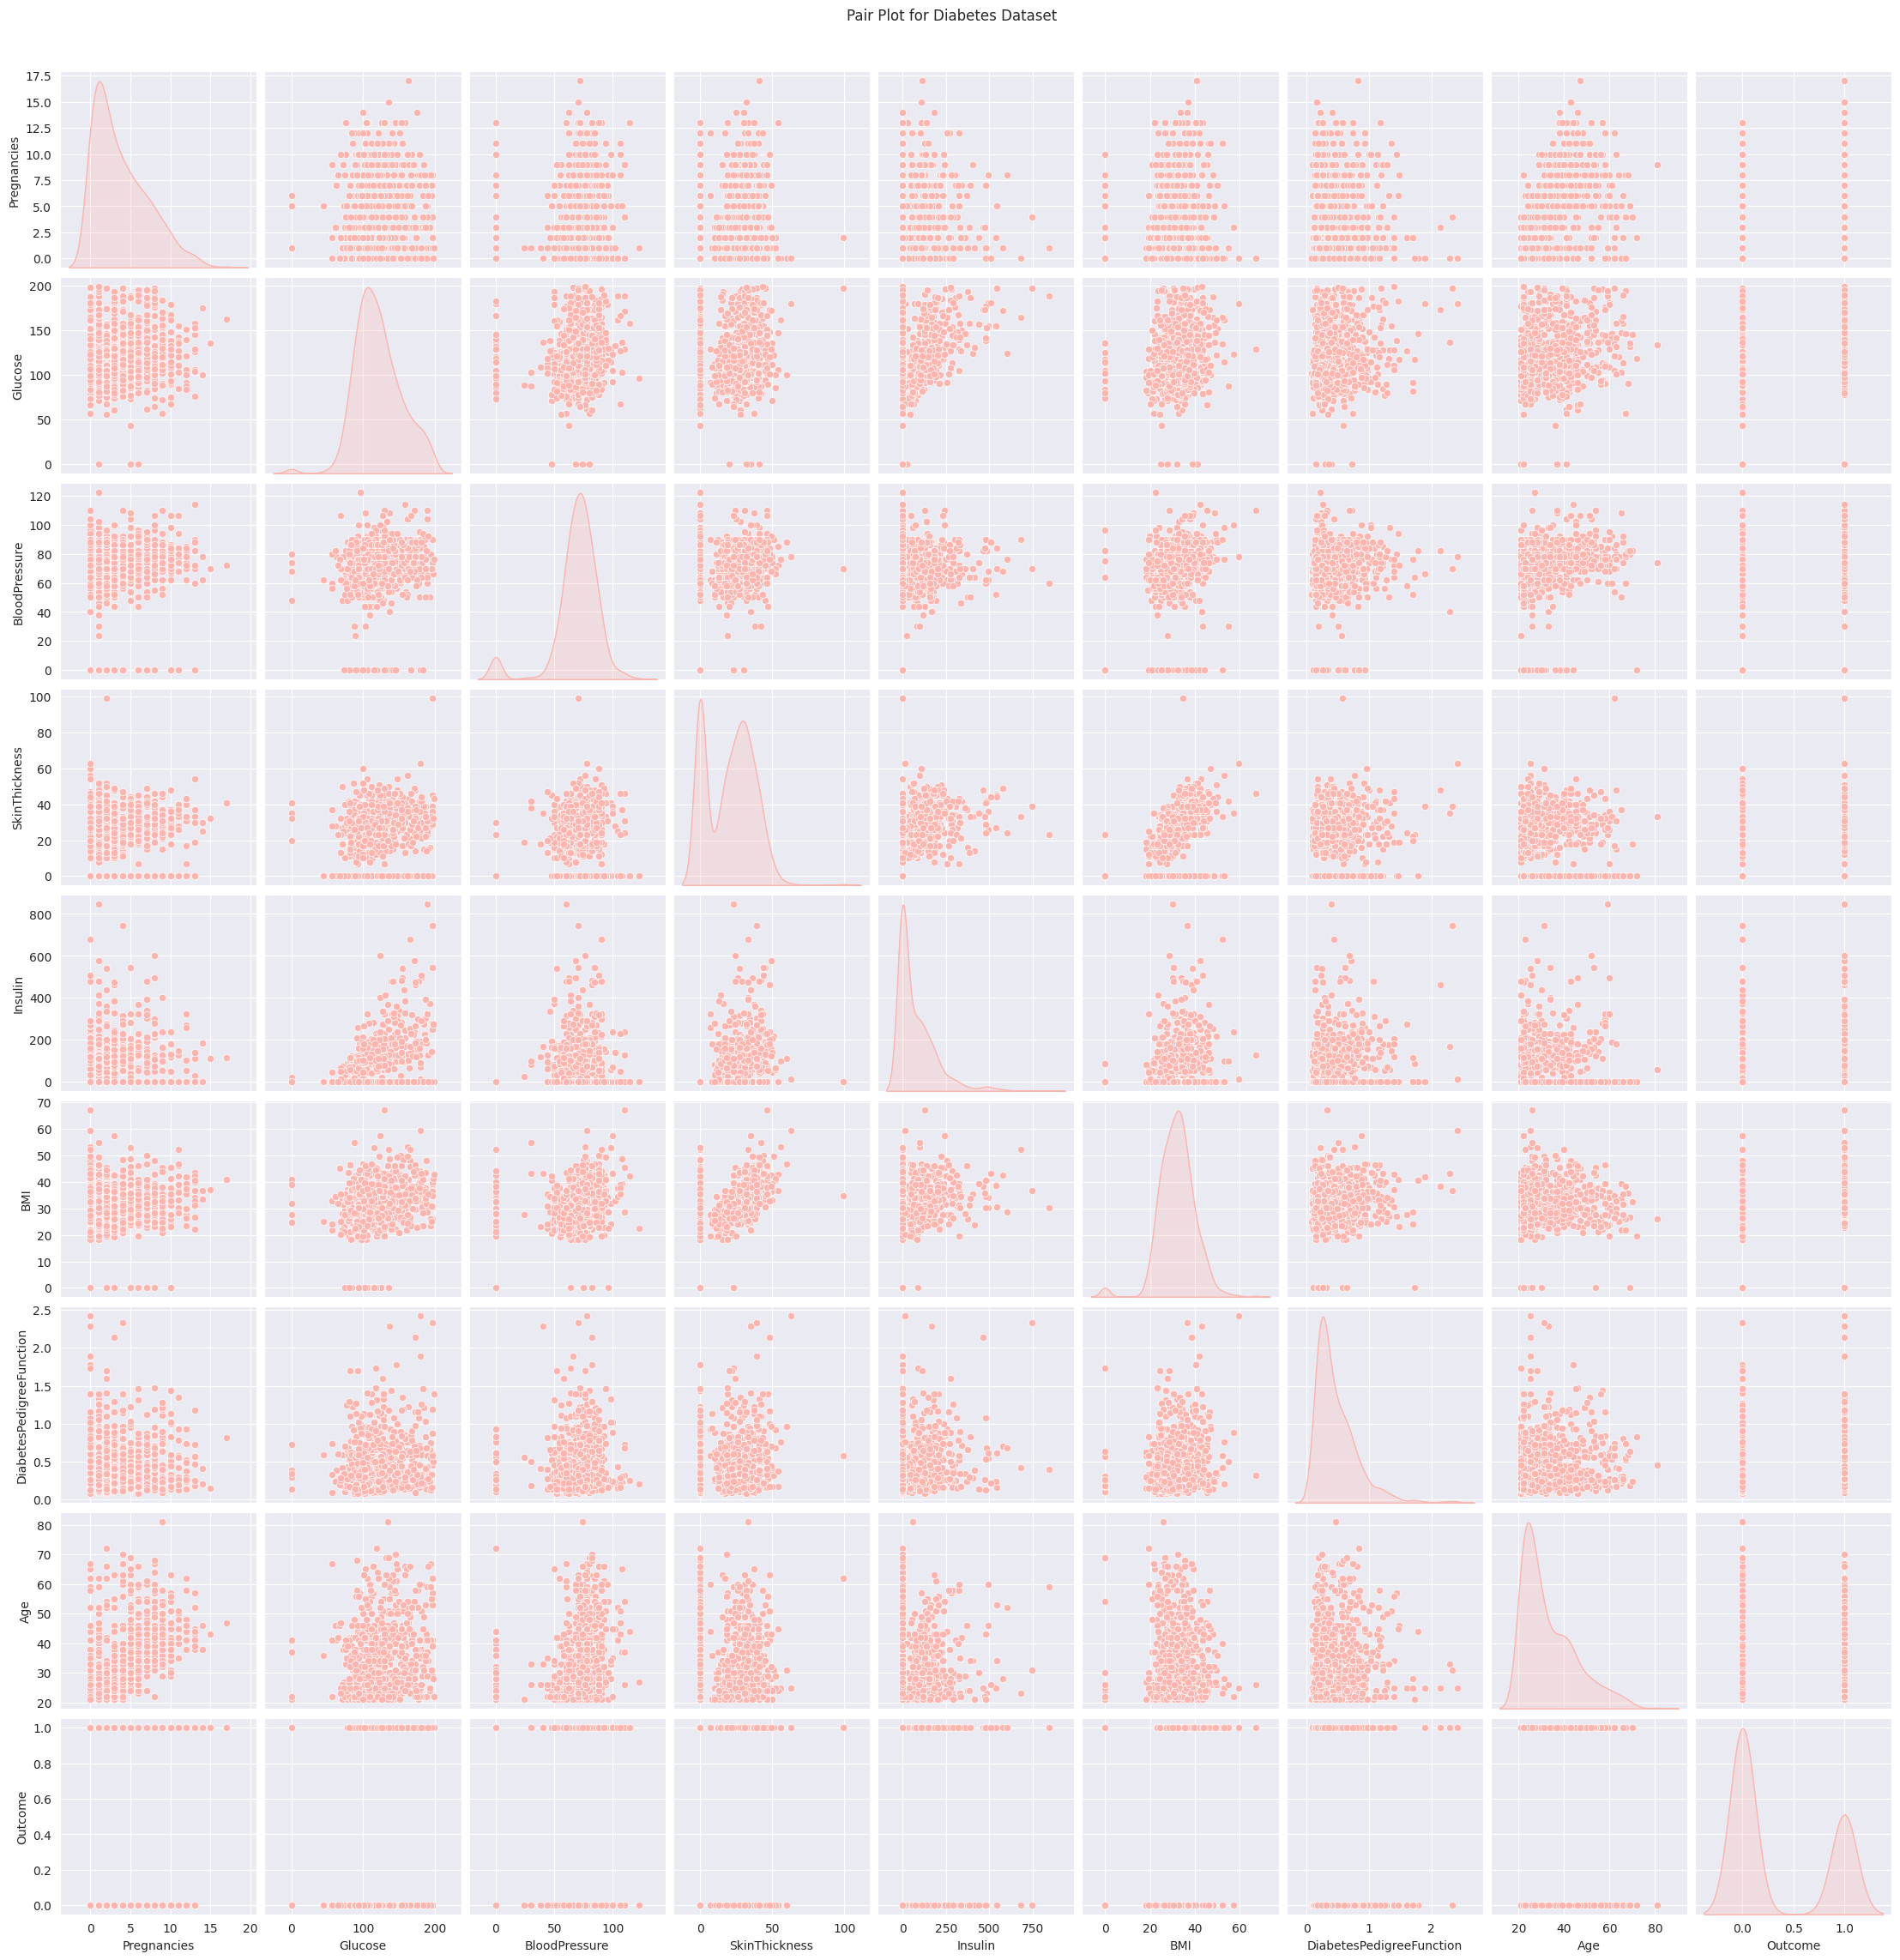

In [10]:
sns.set_palette("Pastel1")
plt.figure(figsize=(10, 6))
sns.pairplot(data, diag_kind="kde")
plt.suptitle('Pair Plot for Diabetes Dataset', y=1.02)
plt.show()


#### correlation matrix plot

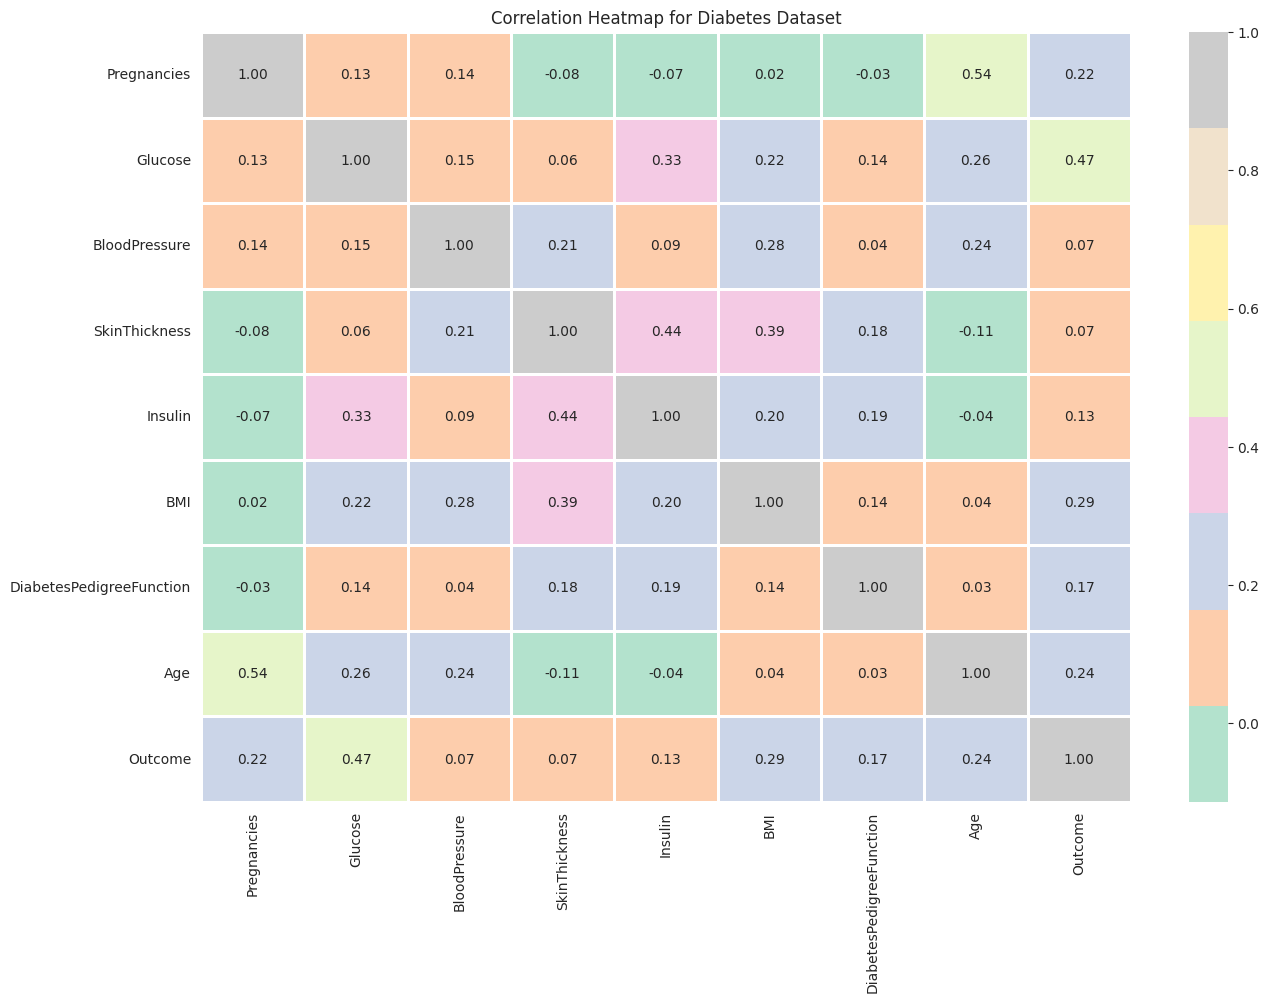

In [11]:
plt.figure(figsize=(15, 10))
sns.heatmap(data.corr(), annot=True, fmt='.2f', cmap='Pastel2', linewidths=2)
plt.title('Correlation Heatmap for Diabetes Dataset')
plt.show()


#### Class Distribution

In [12]:
print(data['Outcome'].value_counts())

Outcome
0    500
1    268
Name: count, dtype: int64


#### 0-->Non Diabetics where 1-->Diabetics

#### Mean values grouped by Outcome

In [13]:
data.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


#### separate the data and labels

In [14]:
X = data.drop(columns='Outcome', axis=1)
y = data['Outcome']
print(X)
print(y)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  
0                       0.627   50  
1                       0.351   31  


## Data Preprocessing

* Data Preprocessing Consists of:
  * Handle Missing/Zero Values
  * Stastical Summary and Outliers
  * Feature Selection
  * Train-Test Split
  * Data Standardization

### Handle Missing/ Zero Values

In [15]:
cols_to_replace = ['Glucose','BloodPressure','SkinThickness','Insulin','BMI']
for col in cols_to_replace:
    data[col] = data[col].replace(0, np.nan)
    data[col] = data[col].fillna(data[col].median())
print("\nAfter cleaning missing/zero values:")
print(data.isnull().sum())


After cleaning missing/zero values:
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


### Stastical Summary & Outliers

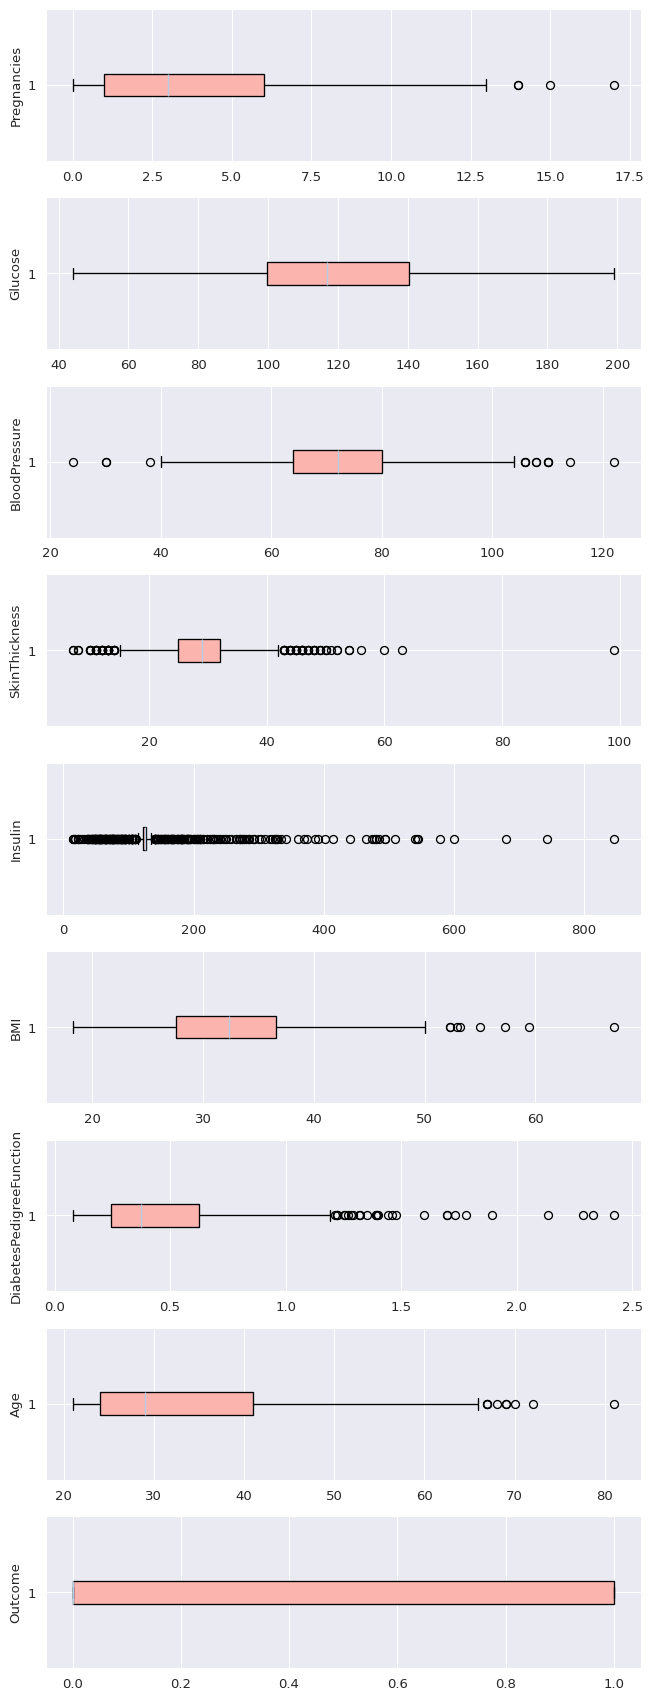

In [16]:
data.describe()
fig, axs = plt.subplots(len(data.columns), 1, figsize=(7, 18), dpi=95)
for i, col in enumerate(data.columns):
    axs[i].boxplot(data[col], vert=False, patch_artist=True)
    axs[i].set_ylabel(col)
plt.tight_layout()
plt.show()

#### Remove Outliers Using IQR

In [17]:
q1, q3 = np.percentile(data['Insulin'], [25, 75])
iqr = q3 - q1
lower = q1 - 1.5 * iqr
upper = q3 + 1.5 * iqr
clean_df = data[(data['Insulin'] >= lower) & (data['Insulin'] <= upper)]

#### correlation matrix

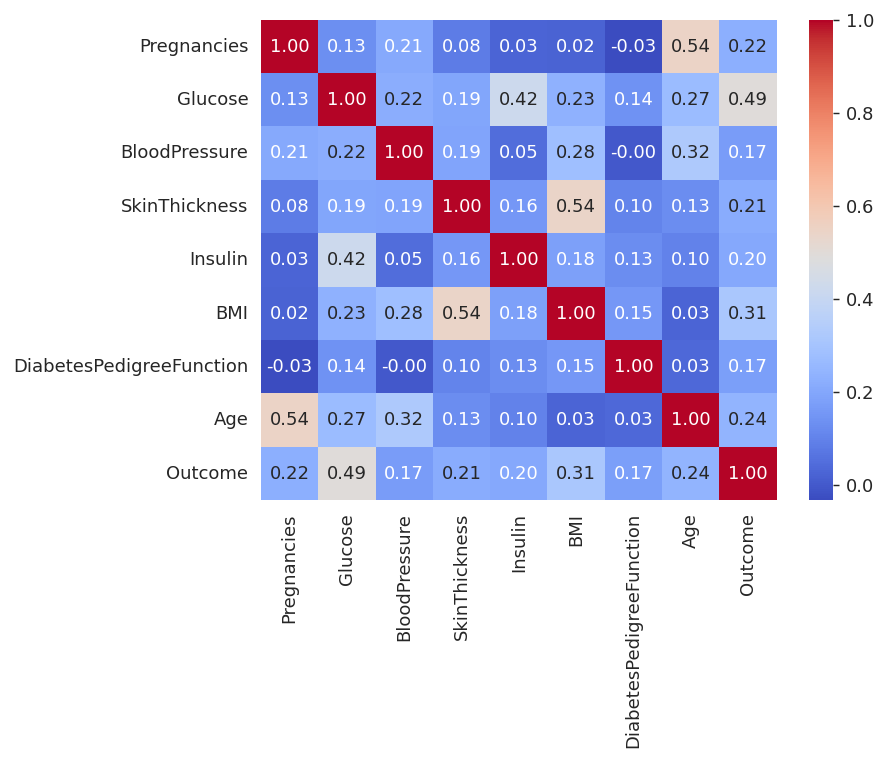

Outcome                     1.000000
Glucose                     0.492782
BMI                         0.312038
Age                         0.238356
Pregnancies                 0.221898
SkinThickness               0.214873
Insulin                     0.203790
DiabetesPedigreeFunction    0.173844
BloodPressure               0.165723
Name: Outcome, dtype: float64


In [18]:
corr = data.corr()
plt.figure(dpi=130)
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm')
plt.show()
print(corr['Outcome'].sort_values(ascending=False))

#### Visualize Target Variable

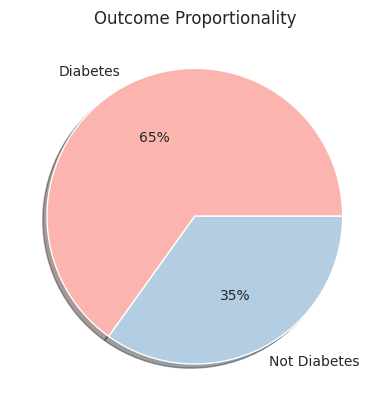

In [19]:
plt.pie(data['Outcome'].value_counts(), labels=[
        'Diabetes', 'Not Diabetes'], autopct='%.f%%', shadow=True)
plt.title('Outcome Proportionality')
plt.show()

### Feature Selection

#### separate the data and labels

In [20]:
X = data.drop(columns='Outcome', axis=1)
y = data['Outcome']
print(X)
print(y)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6    148.0           72.0           35.0    125.0  33.6   
1              1     85.0           66.0           29.0    125.0  26.6   
2              8    183.0           64.0           29.0    125.0  23.3   
3              1     89.0           66.0           23.0     94.0  28.1   
4              0    137.0           40.0           35.0    168.0  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10    101.0           76.0           48.0    180.0  32.9   
764            2    122.0           70.0           27.0    125.0  36.8   
765            5    121.0           72.0           23.0    112.0  26.2   
766            1    126.0           60.0           29.0    125.0  30.1   
767            1     93.0           70.0           31.0    125.0  30.4   

     DiabetesPedigreeFunction  Age  
0                       0.627   50  
1                       0.351   31  


### Train-Test Split

In [21]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,stratify=y,random_state=2)

#### Train/Test Split Shapes

In [22]:
print(X.shape,X_train.shape,X_test.shape)

(768, 8) (614, 8) (154, 8)


### Data Standardization

In [23]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
print("\nData Preprocessing Completed ✅")
print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)


Data Preprocessing Completed ✅
Training set shape: (614, 8)
Testing set shape: (154, 8)


## Training Model


* For training use below algorithms:
  * Logistic Regression(LR)
  * Decistion Tree(DT)
  * Model Comparision(Compare the LR and DT)

### Train Logistic Regression

Logistic Regression Results
Accuracy: 0.7402597402597403
Confusion Matrix:
 [[88 12]
 [28 26]]
Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.88      0.81       100
           1       0.68      0.48      0.57        54

    accuracy                           0.74       154
   macro avg       0.72      0.68      0.69       154
weighted avg       0.73      0.74      0.73       154



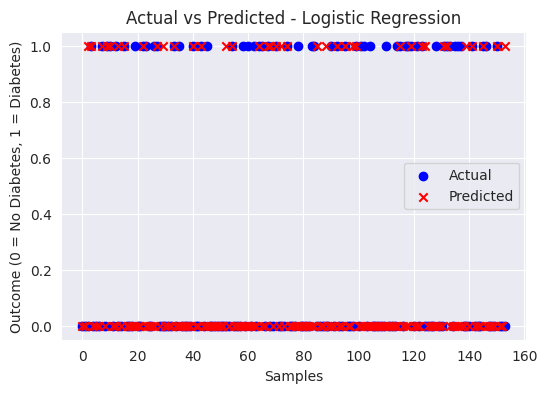

In [24]:
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)
y_pred_log = log_model.predict(X_test)
print("Logistic Regression Results")
print("Accuracy:", accuracy_score(y_test, y_pred_log))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_log))
print("Classification Report:\n", classification_report(y_test, y_pred_log))
# Visualization: Actual vs Predicted
plt.figure(figsize=(6,4))
plt.scatter(range(len(y_test)), y_test, color='blue', label='Actual')
plt.scatter(range(len(y_pred_log)), y_pred_log, color='red', marker='x', label='Predicted')
plt.title('Actual vs Predicted - Logistic Regression')
plt.xlabel('Samples')
plt.ylabel('Outcome (0 = No Diabetes, 1 = Diabetes)')
plt.legend()
plt.show()

### Train Decision Tree

Decision Tree Results
Accuracy: 0.7857142857142857
Confusion Matrix:
 [[83 17]
 [16 38]]
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.83      0.83       100
           1       0.69      0.70      0.70        54

    accuracy                           0.79       154
   macro avg       0.76      0.77      0.77       154
weighted avg       0.79      0.79      0.79       154



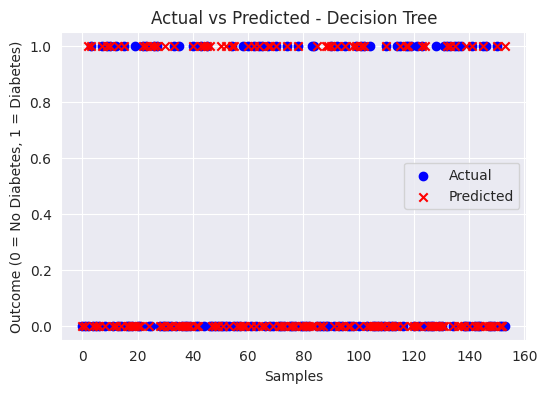

In [25]:
dt_model = DecisionTreeClassifier(random_state=42,max_depth=5)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)
print("Decision Tree Results")
print("Accuracy:", accuracy_score(y_test, y_pred_dt))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_dt))
print("Classification Report:\n", classification_report(y_test, y_pred_dt))
# Visualization: Actual vs Predicted
plt.figure(figsize=(6,4))
plt.scatter(range(len(y_test)), y_test, color='blue', label='Actual')
plt.scatter(range(len(y_pred_dt)), y_pred_dt, color='red', marker='x', label='Predicted')
plt.title('Actual vs Predicted - Decision Tree')
plt.xlabel('Samples')
plt.ylabel('Outcome (0 = No Diabetes, 1 = Diabetes)')
plt.legend()
plt.show()

### Train Random Forest

Random Forest Results:
Accuracy: 0.7467532467532467
Confusion Matrix:
 [[85 15]
 [24 30]]
Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.85      0.81       100
           1       0.67      0.56      0.61        54

    accuracy                           0.75       154
   macro avg       0.72      0.70      0.71       154
weighted avg       0.74      0.75      0.74       154



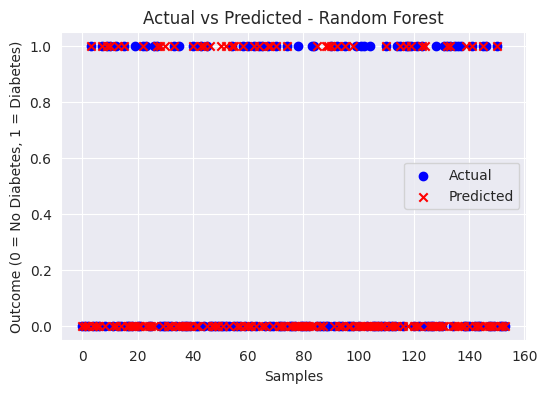

In [26]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
print("Random Forest Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))
# Visualization: Actual vs Predicted
plt.figure(figsize=(6,4))
plt.scatter(range(len(y_test)), y_test, color='blue', label='Actual')
plt.scatter(range(len(y_pred_rf)), y_pred_rf, color='red', marker='x', label='Predicted')
plt.title('Actual vs Predicted - Random Forest')
plt.xlabel('Samples')
plt.ylabel('Outcome (0 = No Diabetes, 1 = Diabetes)')
plt.legend()
plt.show()

### Model Comparision(Logistic regression vs Decision Tree)


🔹 Model Performance Comparison
Logistic Regression: 0.7403
Decision Tree: 0.7857
Random Forest: 0.7468


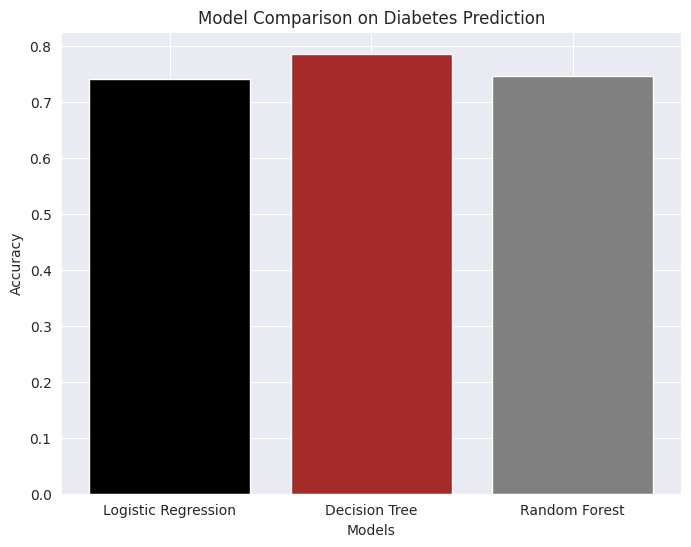

In [27]:
models = {
    "Logistic Regression": accuracy_score(y_test, y_pred_log),
    "Decision Tree": accuracy_score(y_test, y_pred_dt),
    "Random Forest": accuracy_score(y_test, y_pred_rf)
}
print("\n🔹 Model Performance Comparison")
for model, acc in models.items():
    print(f"{model}: {acc:.4f}")
# Visualization
plt.figure(figsize=(8, 6))
plt.bar(models.keys(), models.values(), color=['black', 'brown','Grey'])
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.title("Model Comparison on Diabetes Prediction")
plt.show()
